# Challenge 3: Trade Balance Classification
This challenge tests your ability to create new columns using conditional logic with `numpy.where()`.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tariff_data = pd.read_csv('./data/Tariff Calculations plus Population.csv', delimiter=";")
tariff_data.columns = tariff_data.columns.str.strip().str.lower().str.replace(' ', '_')

In [7]:
tariff_data.head()

,country,us_2024_deficit,us_2024_exports,us_2024_imports_(customs_basis),trump_tariffs_alleged,trump_response,population
0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0
1,Albania,13.4,141.7,128.3,10%,10%,2745972.0
2,Algeria,"-1,447.10","1,014.50","2,461.60",59%,29%,46164219.0
3,Andorra,1.5,4.9,3.4,10%,10%,80856.0
4,Angola,"-1,186.90",682.4,"1,869.20",63%,32%,36749906.0


## Task 1
 Create a new column `trade_balance_flag` using `np.where()`:
   - `"Surplus"` if `us_2024_exports` > `us_2024_imports_customs_basis`  
   - `"Deficit"` if `us_2024_imports_customs_basis` > `us_2024_exports`  
   - `"Balanced"` otherwise

In [8]:
tariff_data['trade_balance_flag'] = np.where(
    tariff_data['us_2024_exports'] > tariff_data['us_2024_imports_(customs_basis)'], 
    'surplus', 
    np.where(
        tariff_data['us_2024_exports'] < tariff_data['us_2024_imports_(customs_basis)'], 
        'deficit', 
        'balanced'
    )
)

## Task 2
Count the number of countries in each trade balance category.

In [9]:
tariff_data['trade_balance_flag'].value_counts()

trade_balance_flag
surplus    107
deficit     97
Name: count, dtype: int64

## Task 3
Plot a bar chart showing the number of countries per `trade_balance_flag`.

<BarContainer object of 2 artists>

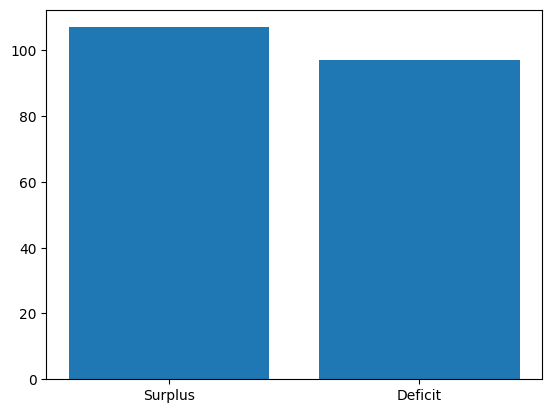

In [11]:
plt.bar(['Surplus', 'Deficit'],tariff_data['trade_balance_flag'].value_counts())